# Library

In [9]:
#System and performance tool
import os

from scipy.stats import norm

#Visualization Tool
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Set raw data folder
RAW_DATA_FOLDER = '/Users/yogisharosarumaha/Documents/GitHub/Predict-House-Price'

# Import Data

In [11]:
#Load Data
import pandas as pd
train_df            =pd.read_csv(os.path.join(RAW_DATA_FOLDER,'train.csv'))
test_df             =pd.read_csv(os.path.join(RAW_DATA_FOLDER,'test.csv'))

In [26]:
#Snapshot of data
print('train_shape : ' + str(train_df.shape))
print(train_df.head(3))
print('-'*100)
print('test_shape : ' + str(test_df.shape))
print(test_df.head(3))
print('-'*100)
print('-'*100)
train_df.info()

train_shape : (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]
----------------------------------------------------------------------------------------------------
test_shape : (1459, 80)
     Id  MSSubCla

### House Selling Price

Text(0.5, 1.0, 'House Sale Price Distribution')

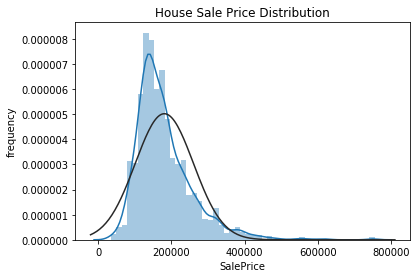

In [13]:
#Check house price distribution 
sns.distplot(train_df['SalePrice'],fit=norm)

plt.ylabel('frequency')
plt.title('House Sale Price Distribution')

### Missing Value

In [14]:
#Check Missing values between columns
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0].to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Variables']
missing_values['Variables'] = missing_values.index

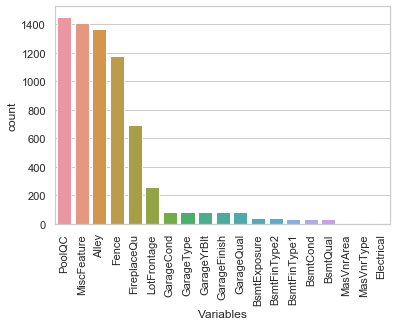

In [15]:
#Lots of missing values coming from PoolQC Variables, followed by MiscFeature
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Variables', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

In [40]:
### Correlation Matrix

In [41]:
#Using correlation, SalePrice has highest relationship with OverallQual (0.790982 correlation coefficient)
#Let's try using linear regression to see how the predictions perform
corr = train_df.corr()
corr.head()
corr.style.background_gradient(cmap='coolwarm', axis=None)

### Linear Regression 

In [44]:
train_df.OverallQual

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [51]:
from sklearn import linear_model, metrics

#Defining feature matrix(X) and response vector(y)
X = train_df.OverallQual
y = train_df.SalePrice

#Splitting X and y into train test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

# generate linear regression object
reg = linear_model.LinearRegression()

# Train model using training set
reg.fit(X_train, y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[ 8  4  6  7  5  5  9  4  8  7  5  6  4  7  6  8  8  7  5  4  8  5  7  8
  6  6  6  5  7  8  7  7  4  8  5  7  6  5  4  6  6  7  7  7  7  8  6  6
  6  2  5  4  6  6  8  5  5  5  7  7  4  6  5  6  5  9  5  8  7  8  7  5
  5  5  5  5  7  7  7  7  7  5  6  8  4  5  7  7  7  6  5  7  8  5  5  5
  7  7  4  6  6  5  4  6  8  8  8  6  6  5  6  7  3  6  7  8  6  6  7  6
  5  5  4  8  7  5  7  6  4  6  5  6  9  6  6  6  4  6  5  7  4  7  8  5
  6  8  6  6  6  7  6  5  5  5  6  7  5  5  6  7  7  6  5  4  8  7  6  6
  6  4  6  9  7  7  7  7  4  6  5  3  7  5  7  6  5  7  5 10  7  7  7  3
  6  8  7  6  8  6  7  6  4  6  5  6  5  7  6  5  8 10  9  8  5  5  7  5
  4  7  5  6  6  6  5  7  8  7  6  6  7  5  5  5  7  6  8  7  4  5  9  6
  5  7  4  7  5  7  4  6  7 10  7  6  7  6  4  6  7  5  6  8  7  4  5  8
  5  5  6  4  6  7  7  8  9  8  5  5  5  5  6  6  6  6  8  7  8  5  5  7
  6  8  5  6  5  9  6  6 10  5  3  7  5  6  6  8  6  8  4  7  5  6  7  6
  5  9  4  8  5  7  5  6  1  6  7  6  7  4  5  5  4  6  6  5  8  6  7  6
  7  8  8  6  5  7  3  7  4  5  6  7  4  4  5  5  7  7  3  8 10  6  5  5
  8  7  5  5  4  7  8  8  5  3  8  7  6  5  8  7  5  8  7  6  8  5  7  6
  4  8  7  5  5  6  5  6  7  8  7  6  8  5  5  5  7  5  6  5  5  5  7  7
  4  5  5  5  8  6  6  6  8  4  5  6  4  6  8  9  6  5  6  6  8  8  5  5
  6  5  8  8  5  7  6  6  5  7  9  4  8  7 10  5  6  5  7  7  7  8  5  5
  5  6  9  6  6  7  6  5  8  4  7  6  6  4  6  5  6  5  8  6  5  5  5  5
  6  5  6  7  6  7  7  6  5  7  5  5  6  6  7  7  5  6  5  7  7  5  7  7
  5  6  7  6  7  6  5  8  7  5  6  5  6  7  7 10  6  3  5  7  6  6  9  6
  8  6  5  6  4  6  7  7  5  6  7  7  7  4  5  5  7  5  6  6  7  5  9  6
  6  6  3  6  5  5  7  9  7  9  5  6  5  8  7  6  8  7  5  6  6  6  6  6
  6  6  5  7  7  6  7  7  9  6  5  7  5  6  5  7  5  5  8  6  6  5  6  6
  6  4  5  6  9  5  8  7  5  5  7  5  6  5  5  7  8  6  9  7  5  5 10  7
  9 10  5  6  5  6  8  5  7  7  6  6  5  6  6  7  8  8  5  7  8  8  6  5
  4  7  7  7  4  6  7  6  5  6  7  5  7  7  5  5  6  8  7  5  5  7  6  6
  5  6  7  5  5  4  8  5  5  5  7  6 10  4  7  7  6  6  6  6  4  6  6  6
  5  8  7  9  6  5  7  5  6  7  5  7  7  5  5  6  7  6  7  6  7  7  8  6
  6  7  5  5  6  7  5  5  4  5  4  6  4  8  7  6  6  4  5  5  9  5  8  5
  5  4  6  6  7  6  8  8  6  6  7  5  8  8  4  5  8  5  6  6  6  6  7  5
  6  7  5  5  7  6  5  5  5  7  8  5  5  6  5  6  7  7  6  4  4  6  8  8
  3  5  6  7  6  7  7  5  8  6  4  8  7  7  6  3  7  6  7  9  7  5  8  7
  7  7  3  4  6  5  7  6  7  7  7 10  6  6  6  7  5  5  6  6  5  8  6  7
  6  4  7  7  7  8  7  6  8  5  8  6  5  5  5  6  7  8  6  5  8  7  5  9
  6  7  4  5  5  5  5  6  5  6  6  3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.